# Import Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Load Datasets

In [2]:
x_train = np.loadtxt("C:/Users/DataScience/ImageClassificationCNN-Keras/input.csv", delimiter=',')
y_train = np.loadtxt("C:/Users/DataScience/ImageClassificationCNN-Keras/labels.csv", delimiter=',')

In [3]:
x_test = np.loadtxt("C:/Users/DataScience/ImageClassificationCNN-Keras/input_test.csv", delimiter=',')
y_test = np.loadtxt("C:/Users/DataScience/ImageClassificationCNN-Keras/labels_test.csv", delimiter=',')

In [4]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2000, 30000)
Shape of y_train:  (2000,)
Shape of x_test:  (400, 30000)
Shape of y_test:  (400,)


# Change Shape

In [5]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

# Normalization

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

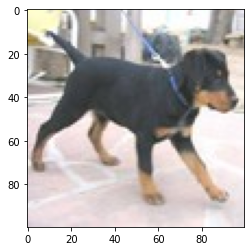

In [8]:
rdm = random.randint(0, len(x_train))
plt.imshow(x_train[rdm,:])
plt.show()

# Model

In [9]:
nn = Sequential([
    Conv2D(32,(3,3), activation="relu", input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [10]:
nn.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [14]:
nn.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 15s 457ms/step - loss: 0.3042 - accuracy: 0.8725
Epoch 2/10
32/32 [==============================] - 14s 420ms/step - loss: 0.2741 - accuracy: 0.8890
Epoch 3/10
32/32 [==============================] - 14s 428ms/step - loss: 0.2368 - accuracy: 0.9040
Epoch 4/10
32/32 [==============================] - 13s 415ms/step - loss: 0.2019 - accuracy: 0.9195
Epoch 5/10
32/32 [==============================] - 13s 405ms/step - loss: 0.1679 - accuracy: 0.9415
Epoch 6/10
32/32 [==============================] - 13s 408ms/step - loss: 0.1293 - accuracy: 0.9650
Epoch 7/10
32/32 [==============================] - 13s 411ms/step - loss: 0.1192 - accuracy: 0.9610
Epoch 8/10
32/32 [==============================] - 13s 413ms/step - loss: 0.0870 - accuracy: 0.9805
Epoch 9/10
32/32 [==============================] - 13s 422ms/step - loss: 0.0755 - accuracy: 0.9825
Epoch 10/10
32/32 [==============================] - 13s 414ms/step - loss: 0.0604 - accura

# Test Accuracy

In [15]:
nn.evaluate(x_test, y_test)

13/13 [==============================] - 1s 64ms/step - loss: 1.0061 - accuracy: 0.6775


[1.0061190128326416, 0.6775000095367432]

# Making Predications

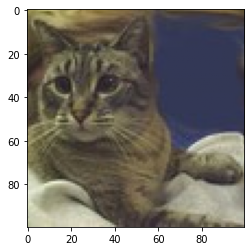

This is a  Cat


In [17]:
rdm2 = random.randint(0, len(y_test))
plt.imshow(x_test[rdm2,:])
plt.show()

y_pred = nn.predict((x_test[rdm2,:].reshape(1,100,100,3)))
y_pred = y_pred >0.5

if(y_pred==0):
    pred = "Dog"
else:
    pred ="Cat"
    
print("This is a ", pred)

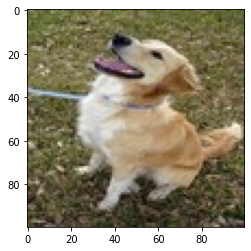

This is a  Dog


In [19]:
rdm2 = random.randint(0, len(y_test))
plt.imshow(x_test[rdm2,:])
plt.show()

y_pred = nn.predict((x_test[rdm2,:].reshape(1,100,100,3)))
y_pred = y_pred >0.5

if(y_pred==0):
    pred = "Dog"
else:
    pred ="Cat"
    
print("This is a ", pred)